# Monte Carlo Simulation: Running Many Scenarios to See What Could Happen

This notebook demonstrates Monte Carlo simulation - a way to test recommendations under uncertainty by running many scenarios.

Understanding this is critical because:
- **Monte Carlo simulation** runs your model thousands of times with random inputs
- Each run uses different values for uncertain variables
- You collect all outcomes and see the range of possible results
- This shows you risk ranges, not just single-point estimates


## Key Concepts

**Monte Carlo Simulation**:
- Runs your model many times (1,000, 10,000, or more)
- Each run picks random values for uncertain inputs
- Collects all outcomes from all runs
- Shows you the distribution of possible results

**What You Learn**:
- Best case outcome
- Worst case outcome
- Most likely outcome (average/median)
- Range of outcomes
- Probability of different results

**Critical insight**: No complex math needed - just run many scenarios and see what happens!


## Scenario: Staffing Cost Estimation

You need to estimate staffing costs for next month. Instead of assuming demand will be exactly 1,000 customers, you recognize demand is uncertain.

**Monte Carlo approach**:
- Run 1,000 scenarios with different demand values
- Calculate costs for each scenario
- See the range: costs could be $450K to $600K
- Understand the risk before budgeting


## Step 1: Install Required Packages (Colab)


In [1]:
# Install required packages (if needed in Colab)
%pip install numpy matplotlib pandas -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.

## Step 2: Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)


## Step 3: Define the Model

First, let's create a simple model that calculates staffing costs based on demand:


In [3]:
# Model: Calculate staffing costs based on customer demand

def calculate_staffing_cost(demand):
    """Calculate total staffing cost for a given demand level"""
    # Base staffing (always needed)
    base_staff = 10
    base_cost = base_staff * 5000  # $5,000 per staff member
    
    # Variable staffing (depends on demand)
    # Need 1 staff per 50 customers
    variable_staff = max(0, (demand - 500) / 50)  # Only if demand > 500
    variable_cost = variable_staff * 5000
    
    # Overtime costs if demand is very high
    overtime_cost = 0
    if demand > 1200:
        overtime_cost = (demand - 1200) * 20  # $20 per customer over capacity
    
    total_cost = base_cost + variable_cost + overtime_cost
    return total_cost

# Test with a single value
print("Model test (demand = 1,000):")
print(f"  Cost: ${calculate_staffing_cost(1000):,.2f}")


Model test (demand = 1,000):
  Cost: $100,000.00


## Step 4: Single Run vs Many Runs

Let's see the difference between a single calculation and Monte Carlo simulation:


In [4]:
# SINGLE RUN (deterministic approach)
demand_single = 1000  # Assume demand is exactly 1,000
cost_single = calculate_staffing_cost(demand_single)

print("SINGLE RUN (Deterministic):")
print(f"  Assumed demand: {demand_single} customers")
print(f"  Calculated cost: ${cost_single:,.2f}")
print(f"\n⚠️  This assumes demand is CERTAIN. But is it?")


SINGLE RUN (Deterministic):
  Assumed demand: 1000 customers
  Calculated cost: $100,000.00

⚠️  This assumes demand is CERTAIN. But is it?


## Step 5: Monte Carlo Simulation - Run Many Scenarios

Now let's run the model many times with different demand values:


In [5]:
# MONTE CARLO SIMULATION: Run many scenarios
# Demand is uncertain - could be anywhere from 800 to 1,200 customers

num_runs = 1000  # Run 1,000 scenarios

# Generate random demand values (normal distribution, mean=1000, std=100)
demand_scenarios = np.random.normal(loc=1000, scale=100, size=num_runs)
demand_scenarios = np.clip(demand_scenarios, 800, 1200)  # Keep within reasonable range

# Calculate cost for each scenario
costs = [calculate_staffing_cost(demand) for demand in demand_scenarios]
costs = np.array(costs)

print("MONTE CARLO SIMULATION RESULTS:")
print(f"  Number of runs: {num_runs:,}")
print(f"  Best case cost: ${costs.min():,.2f}")
print(f"  Worst case cost: ${costs.max():,.2f}")
print(f"  Average cost: ${costs.mean():,.2f}")
print(f"  Median cost: ${np.median(costs):,.2f}")
print(f"  Standard deviation: ${costs.std():,.2f}")
print(f"\n📊 Range: ${costs.min():,.2f} to ${costs.max():,.2f}")
print(f"   This is what you NEED to know for budgeting!")


MONTE CARLO SIMULATION RESULTS:
  Number of runs: 1,000
  Best case cost: $80,000.00
  Worst case cost: $120,000.00
  Average cost: $100,151.12
  Median cost: $100,253.01
  Standard deviation: $9,422.05

📊 Range: $80,000.00 to $120,000.00
   This is what you NEED to know for budgeting!


## Step 6: Visualize the Distribution

Let's see the distribution of outcomes:


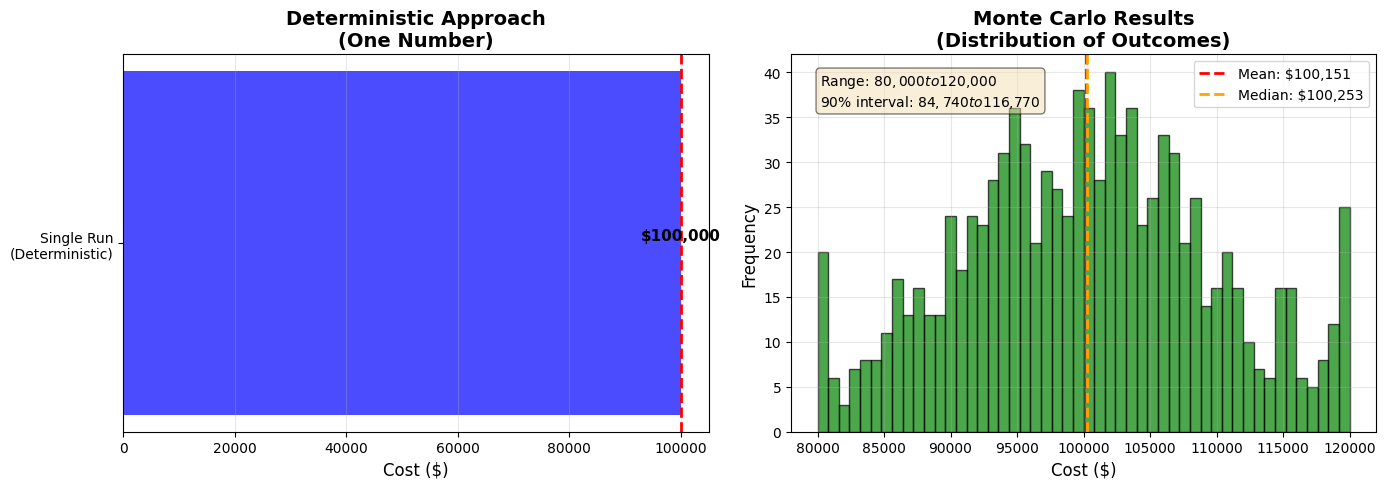


🔍 KEY INSIGHT:
   Deterministic: One number (${cost_single:,.0f})
   Monte Carlo: Range (${costs.min():,.0f} to ${costs.max():,.0f})
   The range shows RISK that the single number hides!


In [6]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: Single run (deterministic)
ax1.barh(['Single Run\n(Deterministic)'], [cost_single], color='blue', alpha=0.7)
ax1.axvline(cost_single, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Cost ($)', fontsize=12)
ax1.set_title('Deterministic Approach\n(One Number)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.text(cost_single, 0, f'${cost_single:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Right: Monte Carlo results (distribution)
ax2.hist(costs, bins=50, color='green', alpha=0.7, edgecolor='black')
ax2.axvline(costs.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${costs.mean():,.0f}')
ax2.axvline(np.median(costs), color='orange', linestyle='--', linewidth=2, label=f'Median: ${np.median(costs):,.0f}')
ax2.set_xlabel('Cost ($)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Monte Carlo Results\n(Distribution of Outcomes)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Add statistics box
textstr = f'Range: ${costs.min():,.0f} to ${costs.max():,.0f}\n'
textstr += f'90% interval: ${np.percentile(costs, 5):,.0f} to ${np.percentile(costs, 95):,.0f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print("\n🔍 KEY INSIGHT:")
print("   Deterministic: One number (${cost_single:,.0f})")
print("   Monte Carlo: Range (${costs.min():,.0f} to ${costs.max():,.0f})")
print("   The range shows RISK that the single number hides!")


## Step 7: Understanding Probabilities

Monte Carlo simulation also tells you probabilities:


In [7]:
# Calculate probabilities
budget_limit = 55000  # Budget limit
prob_over_budget = (costs > budget_limit).sum() / len(costs) * 100
prob_under_45000 = (costs < 45000).sum() / len(costs) * 100

print("PROBABILITY ANALYSIS:")
print(f"  Probability cost > ${budget_limit:,}: {prob_over_budget:.1f}%")
print(f"  Probability cost < $45,000: {prob_under_45000:.1f}%")
print(f"\n💡 This helps you plan:")
if prob_over_budget > 10:
    print(f"   ⚠️  {prob_over_budget:.1f}% chance of exceeding budget - risky!")
else:
    print(f"   ✅ Low risk of exceeding budget")

# Show percentiles
print(f"\n📊 Percentiles:")
for p in [10, 25, 50, 75, 90]:
    print(f"   {p}th percentile: ${np.percentile(costs, p):,.2f}")


PROBABILITY ANALYSIS:
  Probability cost > $55,000: 100.0%
  Probability cost < $45,000: 0.0%

💡 This helps you plan:
   ⚠️  100.0% chance of exceeding budget - risky!

📊 Percentiles:
   10th percentile: $87,552.37
   25th percentile: $93,524.10
   50th percentile: $100,253.01
   75th percentile: $106,479.44
   90th percentile: $113,056.45


## Key Takeaways

1. **Monte Carlo simulation is simple**: Run your model many times with random inputs, collect outcomes.

2. **You see the full range**: Not just average, but best case, worst case, and distribution.

3. **Probabilities matter**: You can see the chance of different outcomes (e.g., 20% chance of exceeding budget).

4. **More runs = clearer picture**: 1,000 runs give a good picture; 10,000 runs give a clearer one.

5. **No complex math needed**: The concept is intuitive - just run many scenarios and see what happens.

**Next steps**: In the next notebook, we'll practice interpreting simulation outputs to make decisions.
